In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from  sklearn.model_selection  import train_test_split

x_train,y_train,x_test,y_test=train_test_split(perch_length,perch_weight,random_state=42)

In [ ]:
x_train.shape

(42,)

In [ ]:
x_train,y_train=x_train.reshape(-1,1),y_train.reshape(-1,1)

In [ ]:
x_train.shape

(42, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,x_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
knr.predict([[50]])

array([1033.33333333])

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


In [ ]:
import matplotlib.pyplot as plt

distances,indexes=knr.kneighbors([[50]])
print(distances,indexes)

[[6. 7. 7.]] [[34  8 14]]


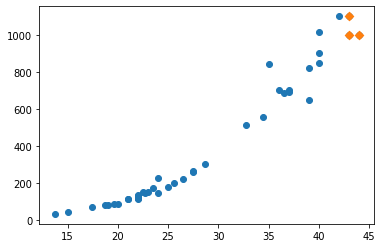

In [ ]:
plt.scatter(x_train,x_test)
plt.scatter(x_train[indexes],x_test[indexes],marker='D')
plt.scatter(50,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,x_test)
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
print(lr.coef_,lr.intercept_)        #기울기와 편향

[39.01714496] -709.0186449535477


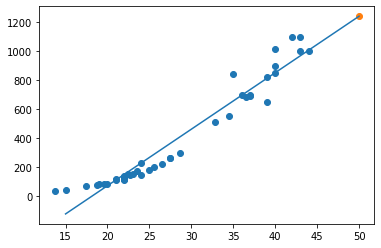

In [ ]:
plt.scatter(x_train,x_test)
plt.plot([15,50],[lr.coef_*15+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8)

In [ ]:
train_poly=np.column_stack((x_train**2,x_train))
test_poly=np.column_stack((x_test**2,x_test))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x_train)

x_poly

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ],
       [  25.  ,  625.  ],
       [  40.  , 1600.  ],
       [  39.  , 1521.  ],
       [  43.  , 1849.  ],
       [  22.  ,  484.  ],
       [  20.  ,  400.  ],
       [  22.  ,  484.  ],
       [  24.  ,  576.  ],
       [  27.5 ,  756.25],
       [  43.  , 1849.  ],
       [  40.  , 1600.  ],
       [  24.  ,  576.  ],
       [  21.  ,  441.  ],
       [  27.5 ,  756.25],
       [  40.  , 1600.  ],
       [  32.8 , 1075.84],
       [  26.5 ,  702.25],
       [  36.5 , 1332.25],
       [  13.7 ,  187.69],
       [  22.7 ,  515.29],
       [  15.  ,  225.  ],
       [  37.  , 1369.  ],
       [  35.  , 1225.  ],
       [  28.7 ,  823.69],
       [  23.5 ,  552.25],
       [  39.  , 1521.  ],
       [  21.  ,  441.  ],
       [  23.  ,  529.  ],
       [  22.  ,  484.  ],
       [  44.  , 1936.  ],
       [  22.5 ,  506.25],
       [  19.  ,  361.  ],
 

In [ ]:
lr=LinearRegression()
lr.fit(train_poly,x_test)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [ ]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


In [ ]:
#1.01*x**2+(-21.557*x)+116.05= 2차방정식